# ANLY-590 HW 1

## 1. 

**Regularization.** Using the accompanying *Hitters* dataset, we will explore regression models to predict a player's Salary from other variables. 

Data: https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import linear_model
from scipy import interpolate
from sklearn.linear_model import lars_path, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

In [4]:
df = pd.read_csv("~/Downloads/Hitters.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


In [6]:
df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [7]:
df = df.dropna(how = "any")

In [8]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


## 1.1.

Use **LASSO regression** to predict Salary from the other numeric predictors. Create a visualization of the coeffecient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to and the optimal value of the regularization penality. How many predictors are left in that model?

In [9]:
X = df.drop(['Unnamed: 0', 'Salary', 'Division', 'NewLeague', 'League'],axis = 1)
y = df['Salary']

In [10]:
X_normalized = preprocessing.normalize(X)

Get coeffecient trajectories.

In [11]:
lasso = Lasso(max_iter = 10000) # normalize = True
coefs = []
n_alphas = 200
alphas = np.logspace(2, -1, n_alphas)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_normalized, y)
    coefs.append(lasso.coef_)

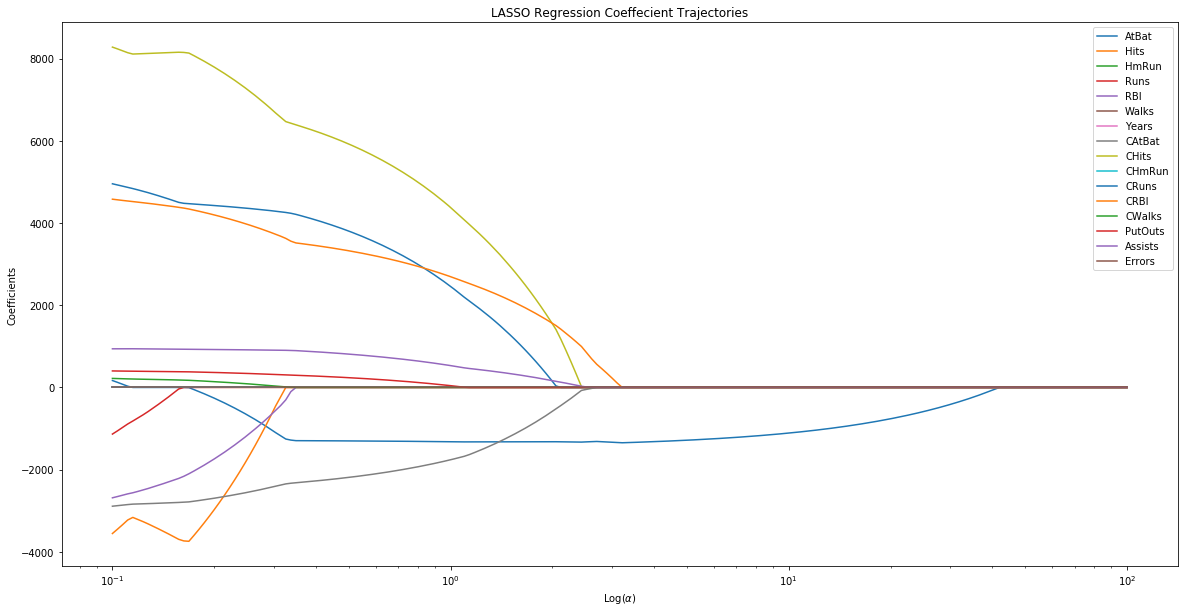

In [13]:
ax = plt.gca()

for a in range(np.array(coefs).shape[1]):
    plt.plot(alphas, np.array(coefs)[:,a], label=list(X.columns)[a])

ax.set_xlim(ax.get_xlim()[::1])
ax.set_xscale('log')
plt.rcParams['figure.figsize'] = [20, 10]
plt.title("LASSO Regression Coeffecient Trajectories")
plt.axis('tight')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.legend()
plt.show()

The last 3 predictors are: `Hits`, `CRuns`, and `CRBI`.

Use cross-validation to find the optimal value of the regularization penality.

In [15]:
reg = LassoCV(cv=10, random_state=0, alphas = alphas, max_iter=1500).fit(X_normalized, y.values)
reg.alpha_

0.1414991297434576

The alpha (the amount of penalization) for LASSO regression chosen by cross validation is 0.14.

In [19]:
lasso.set_params(alpha = 0.14)
lasso.fit(X_normalized, y.values)
lasso.coef_

array([   -0.        , -3480.73012314,    -0.        ,  -350.35908346,
       -2351.60850429,     0.        ,    -0.        , -2813.76465891,
        8137.69851607,     0.        ,  4637.47411768,  4437.75299537,
         191.34471095,   387.47542492,   935.45309986,     0.        ])

There are 10 predictors left in the model. They are:

In [21]:
X.columns[np.absolute(lasso.coef_) > 0]

Index(['Hits', 'Runs', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks',
       'PutOuts', 'Assists'],
      dtype='object')


## 1.2 

Use **Ridge regression** to predict Salary from the other numeric predictors. Visualize coeffecient trajectories. Use cross- validation to find the optimal vaule of the regularization penalty.

In [22]:
ridge = Ridge(max_iter = 10000) # normalize = True
coefs = []
n_alphas = 200
alphas = np.logspace(4, -1, n_alphas)

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_normalized, y)
    coefs.append(ridge.coef_)

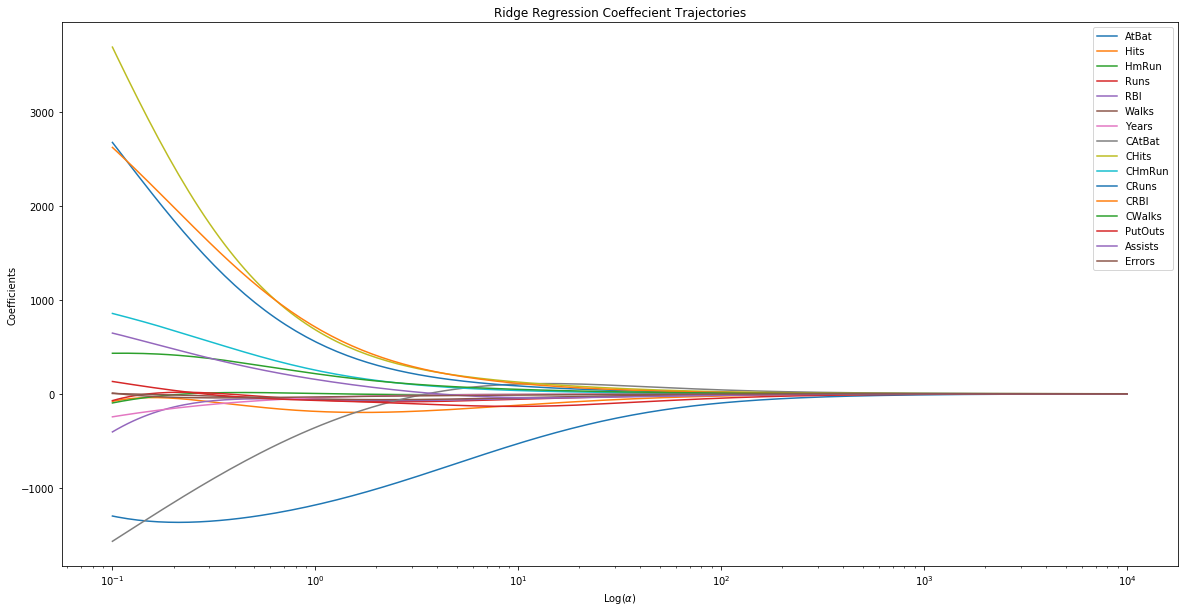

In [23]:
ax = plt.gca()

for a in range(np.array(coefs).shape[1]):
    plt.plot(alphas, np.array(coefs)[:,a], label=list(X.columns)[a])

ax.set_xlim(ax.get_xlim()[::1])
ax.set_xscale('log')
plt.title("Ridge Regression Coeffecient Trajectories")
plt.axis('tight')
plt.xlabel('Log($\\alpha$)')
plt.ylabel('Coefficients')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [24]:
reg = RidgeCV(cv=10, alphas = alphas).fit(X_normalized, y.values)
reg.alpha_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.1

The alpha (the amount of penalization) for Ridge regression chosen by cross validation is 0.1.

In [25]:
ridge.set_params(alpha = 0.1)
ridge.fit(X_normalized, y.values)
ridge.coef_

array([-1.30057930e+03, -8.05492378e+01, -9.74956103e+01, -7.23779966e+01,
       -4.05561139e+02,  3.20301985e+00, -2.45126348e+02, -1.56941450e+03,
        3.68893222e+03,  8.54939163e+02,  2.67465683e+03,  2.62150219e+03,
        4.31279890e+02,  1.31136806e+02,  6.45834511e+02,  8.05978551e+00])

There are 16 predictors left in the model. They are:

In [26]:
X.columns[np.absolute(ridge.coef_) > 0]

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

## 2.

**What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.**

Regularization is a process of introducing additional information in order to prevent overfitting. It performs feature selection by shrinking the contribution of each feature by helping select a midpoint between the first scenario of high bias and the latter scenario of high variance. 

In Q1, both LASSO and Ridge Regression trade off an increase in bias with a decrease in variance. If we look at the trajectory plots of LASSO Regressions, we can see that the larger the alpha (penalty) is, the smaller the coeffecients are, which means that with unlimited increase of alpha, LASSO will set some of the coefficients to
exactly zero. Hence, LASSO is a form of feature selection, identifying a relevant subset of the covariates with which to predict. Ridge is a kind of shrinkage, which constrains the coefficients to live within a sphere of radius. 

Both regressions encourage smaller and simpler models. Simpler models are more robust to overfitting because of a closer match to the training data and can also be more interpretable, which is another goal of regression.